<a href="https://colab.research.google.com/github/caiosaboia/mineracao_de_dados/blob/main/atividade_1/atividade1_minera%C3%A7ao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Primeira parte do trabalho:



1. **O que é uma transformação de atributo? Cite um exemplo de como isto pode ajudar os métodos de aprendizado.**
   
   Uma transformação de atributo altera as características de uma variável para melhorar a representação dos dados, como normalizar valores para evitar que atributos de escalas diferentes dominem o aprendizado.

2. **Por que gráficos de dispersão dos dados são interessantes de serem observados antes de fazer o aprendizado supervisionado?**  
   
   Eles ajudam a visualizar padrões, tendências, outliers e relações entre variáveis, o que pode influenciar escolhas de modelos ou preprocessamento.

3. **Qual é o motivo pelo qual os dados podem não ser IID (independentes e identicamente distribuídos) no exemplo de filtragem de spam de e-mail da aula?**  
   
   Se fosse o caso, não poderiamos ter o aprendizado de fato. Já que todo email(originalmente) é diferente do outro, tornando-os únicos.

4. **Qual é a diferença entre um conjunto de validação e um conjunto de teste?**  
   
   O conjunto de validação é usado para ajustar hiperparâmetros, enquanto o conjunto de teste avalia o desempenho final do modelo.

5. **Por que não podemos (normalmente) usar o erro de treinamento para selecionar um hiperparâmetro?**  
   
   Porque o erro de treinamento tende a ser otimista, não refletindo o desempenho real do modelo em dados não vistos.

6. **Naïve Bayes faz a suposição de que todos os recursos são condicionalmente independentes, dado o rótulo da classe. Por que essa suposição é necessária e o que aconteceria sem ela?**  
   
   A suposição simplifica o cálculo das probabilidades; sem ela, seria necessário estimar distribuições conjuntas complexas, o que pode ser inviável.

7. **Por que o KNN é considerado um método não paramétrico e quais são as consequências indesejáveis ​​do design não paramétrico do KNN?**  
   
   Ele não assume uma forma específica para a função subjacente, mas requer grande armazenamento e é lento em grandes conjuntos de dados devido à busca por vizinhos.

8. **Para qualquer modelo paramétrico, como o aumento do número de exemplos de treinamento afeta as duas partes do custo-benefício fundamental?**  
   
   Reduz o viés, aproximando melhor a função verdadeira, mas pode aumentar os custos computacionais.

9. **Tanto o aprendizado supervisionado quanto os modelos de agrupamento recebem uma entrada x_i e produzem um rótulo y_i. Qual é a principal diferença?**  
   
   No aprendizado supervisionado, os rótulos são fornecidos durante o treinamento, enquanto no agrupamento os rótulos são descobertos automaticamente.

10. **No agrupamento k-means, os clusters são garantidamente regiões convexas. As áreas que recebem o mesmo rótulo por KNN também são convexas?**  
   
   Não, porque o KNN classifica pontos com base nos vizinhos mais próximos, resultando em regiões potencialmente não convexas.

# 2 - Segunda parte

Fraulde em Cartão de Crédito

AUC-PR: 0.7442 



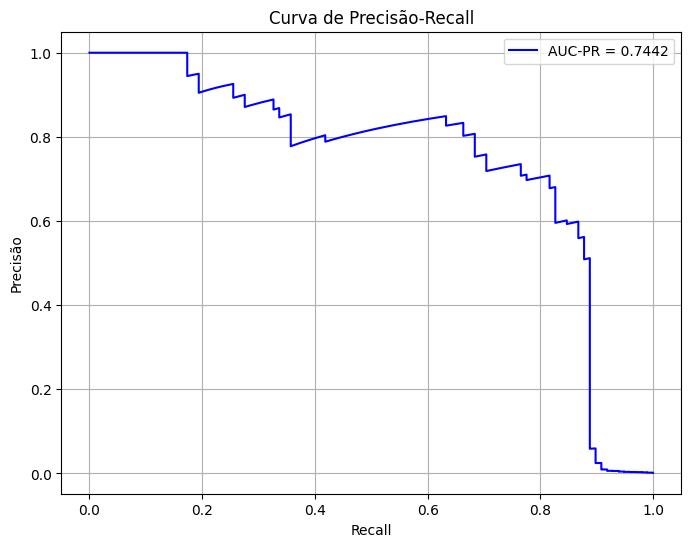

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc


data_cartao = pd.read_csv('creditcard.csv')

X = data_cartao.drop(columns=['Class'])
y = data_cartao['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.4f} \n")


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.4f}', color='blue')
plt.title('Curva de Precisão-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.legend()
plt.grid()
plt.show()


Titanic

Acurácia do Modelo: 0.8045
Matriz de Confusão:
[[89 16]
 [19 55]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



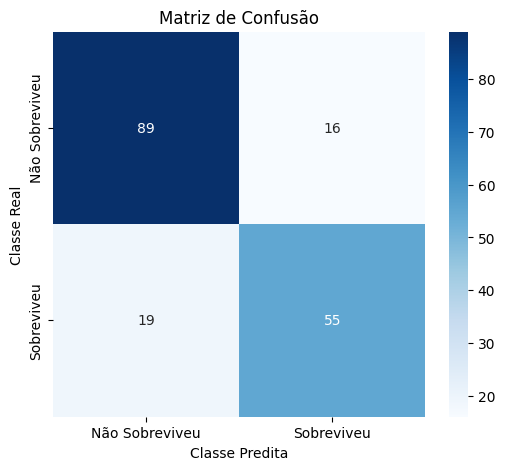

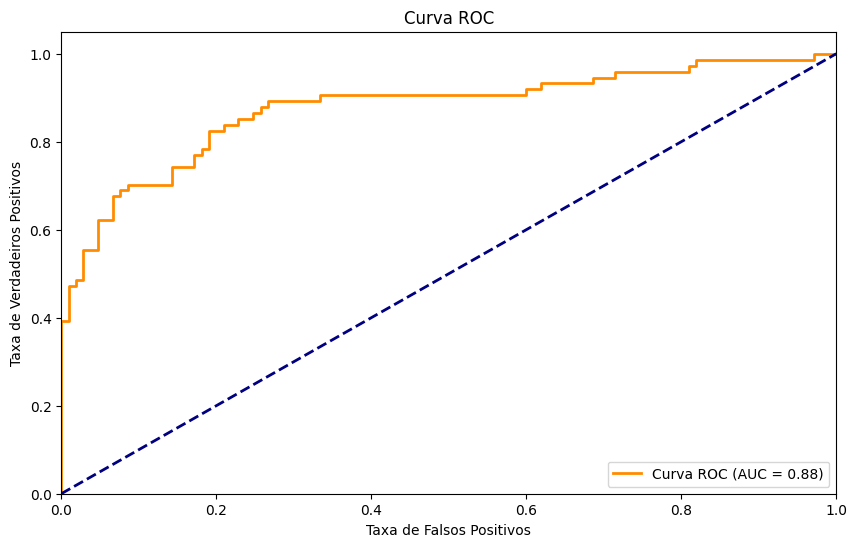

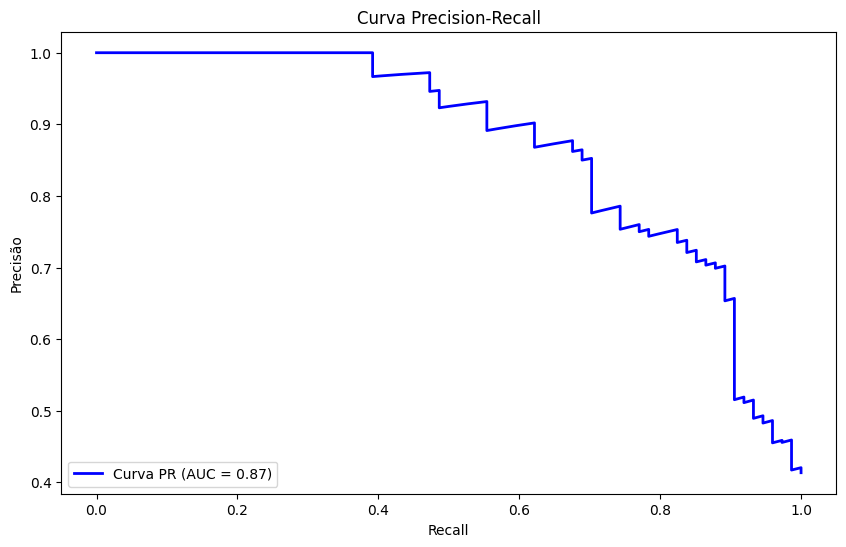

In [14]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar o dataset (substitua o caminho conforme necessário)
titanic_data = pd.read_csv('titanic.csv')

# Verificando valores nulos
titanic_data.isnull().sum()

# Preenchendo valores nulos para 'Age' com a média
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())

# Preenchendo valores nulos para 'Embarked' com o valor mais comum
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

# Criando variáveis dummy para variáveis categóricas
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Separando as variáveis independentes (X) e dependentes (y)
X = titanic_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

# Dividindo os dados em treinamento e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalando os dados (opcional, mas útil para modelos de ML)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializando o modelo de Regressão Logística
model = LogisticRegression()

# Treinando o modelo
model.fit(X_train_scaled, y_train)

# Fazendo previsões sobre os dados de teste
y_pred = model.predict(X_test_scaled)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Exibindo os resultados
print(f'Acurácia do Modelo: {accuracy:.4f}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)

# Plotando a Matriz de Confusão como um Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])

# Títulos e rótulos
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()
print("\n")

# Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10,6))
plt.plot(recall, precision, color='blue', lw=2, label='Curva PR (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()


# 3 - Terceira parte

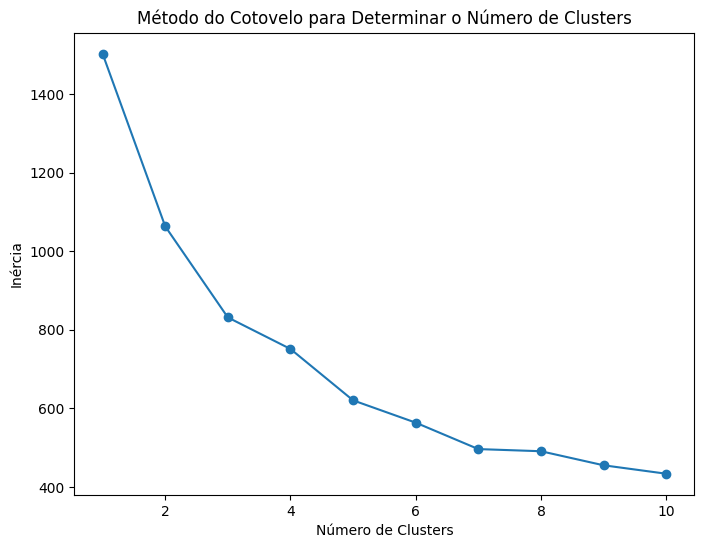

               country  Cluster
0          Afghanistan        2
1              Albania        0
2              Algeria        0
3               Angola        2
4  Antigua and Barbuda        0
Centros dos Clusters:
   child_mort   exports    health   imports    income  inflation  life_expec  \
0   -0.393282 -0.030584 -0.206179  0.019562 -0.250930  -0.005783    0.226762   
1   -0.827449  0.645080  0.727411  0.190639  1.484243  -0.484921    1.079579   
2    1.413564 -0.457615 -0.187898 -0.189897 -0.707839   0.398989   -1.297031   

   total_fer      gdpp  
0  -0.402579 -0.355832  
1  -0.791877  1.615995  
2   1.402874 -0.612761  


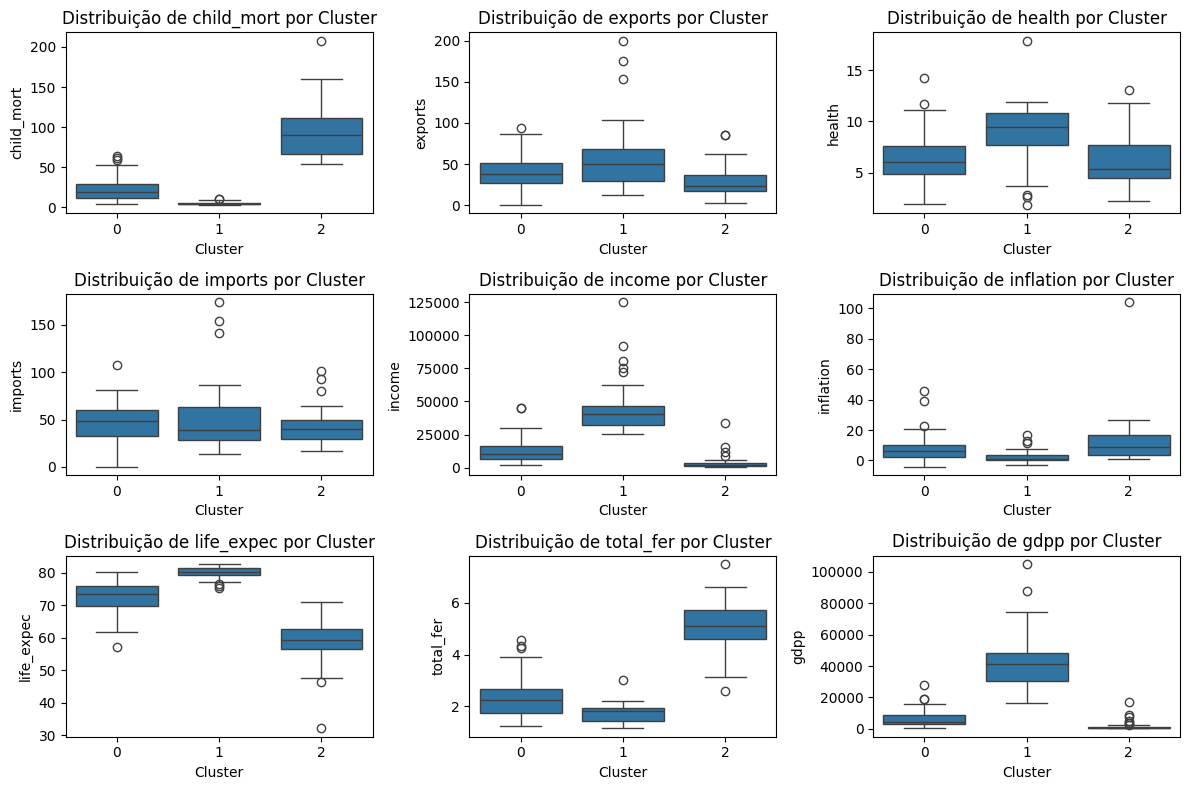

Índice de Silhueta: 0.2856


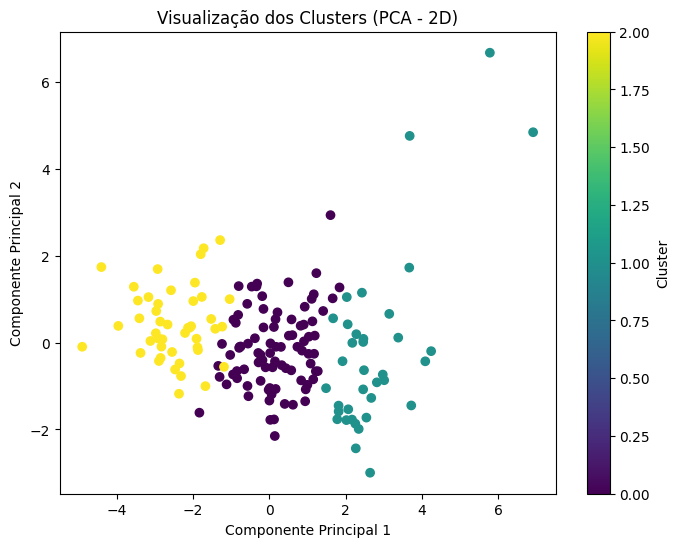

Países mais necessitados (Cluster 0):
                 country  Cluster
1                Albania        0
2                Algeria        0
4    Antigua and Barbuda        0
5              Argentina        0
6                Armenia        0
..                   ...      ...
160              Uruguay        0
161           Uzbekistan        0
162              Vanuatu        0
163            Venezuela        0
164              Vietnam        0

[86 rows x 2 columns]


In [22]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Carregar os dados (substitua pelo caminho correto do seu arquivo)
df = pd.read_csv('/content/Country-data.csv')

# Selecionar as colunas relevantes para o agrupamento
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
X = df[features]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar o número ideal de clusters usando o Método do Cotovelo
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# De acordo com o gráfico, escolher o número de clusters (por exemplo, 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar os clusters
print(df[['country', 'Cluster']].head())

# Analisando as características médias de cada cluster
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("Centros dos Clusters:")
print(cluster_centers)

# Analisando a distribuição de cada cluster com boxplots
plt.figure(figsize=(12,8))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribuição de {feature} por Cluster')
plt.tight_layout()
plt.show()

# Avaliar a qualidade do agrupamento usando o índice de silhueta
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f'Índice de Silhueta: {silhouette_avg:.4f}')

# Visualizando os clusters em um gráfico 2D (com as duas primeiras componentes principais)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Visualização dos Clusters (PCA - 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

# Análise dos países mais necessitados com base nos clusters
# Vamos considerar o Cluster 0 como mais necessitado, por exemplo
needy_countries = df[df['Cluster'] == 0]
print("Países mais necessitados (Cluster 0):")
print(needy_countries[['country', 'Cluster']])

